<a href="https://colab.research.google.com/github/Augusta02/Crypto-Prices-Prediction/blob/main/FBProphet_on_Cryptocurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on reports on reports on Forbes Advisor, Cardano is a blockchain network which is improving the functionality of other networks which came before it that is Bitcoin and Ethereum and it's considered to be the Crypto 3.0. From historical data we have seen the growth of Bitcoin and Ethereum over the years and this project would like to view the growth of the Cardano coin ADA. We would investigate he relationship between the data points and try to use the Facebook Prophet model to predict the price of ADA. 

We would be using historical data from Kaggle.


In [1]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 1.7 MB/s 
     |████████████████████████████████| 49 kB 3.2 MB/s 
     |████████████████████████████████| 45 kB 694 kB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641940 sha256=118053810547ca78ca67db57310f39a0166e4a8cba014be27779774aebbd0e62
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [17]:
from google.colab import files
uploaded = files.upload()

Saving Cardano historic data.csv to Cardano historic data (1).csv


In [18]:
import io
df=  pd.read_csv(io.BytesIO(uploaded['Cardano historic data.csv']))
df

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,"Jul 27, 2021",1.239114,1.255189,1.269624,1.215022,519.03M,-1.28
1,"Jul 26, 2021",1.255189,1.228191,1.397445,1.222583,596.83M,2.20
2,"Jul 25, 2021",1.228135,1.216000,1.236100,1.191199,181.71M,1.08
3,"Jul 24, 2021",1.215002,1.205285,1.223699,1.197844,221.74M,0.80
4,"Jul 23, 2021",1.205386,1.185634,1.206692,1.147027,91.89M,1.65
...,...,...,...,...,...,...,...
1300,"Jan 04, 2018",1.104300,1.100000,1.350000,1.050000,19.60M,2.25
1301,"Jan 03, 2018",1.080000,0.978180,1.090000,0.888210,20.23M,41.73
1302,"Jan 02, 2018",0.762000,0.702200,0.800000,0.675000,10.97M,8.52
1303,"Jan 01, 2018",0.702200,0.710000,0.715000,0.632000,17.95M,-1.10


In [19]:
# fbprophet is a univariate model
# therefore we would only be needing the date time series and the price at the end of the day
df.reset_index(inplace=True)
df= df[['Date', 'Price(in dollars)']]
df

,Date,Price(in dollars)
0,"Jul 27, 2021",1.239114
1,"Jul 26, 2021",1.255189
2,"Jul 25, 2021",1.228135
3,"Jul 24, 2021",1.215002
4,"Jul 23, 2021",1.205386
...,...,...
1300,"Jan 04, 2018",1.104300
1301,"Jan 03, 2018",1.080000
1302,"Jan 02, 2018",0.762000
1303,"Jan 01, 2018",0.702200


In [20]:
# in fbprophet columns need to be named 'ds' and 'y'
# therefore we would be changing the columns names
df.columns = ['ds', 'y']
df

,ds,y
0,"Jul 27, 2021",1.239114
1,"Jul 26, 2021",1.255189
2,"Jul 25, 2021",1.228135
3,"Jul 24, 2021",1.215002
4,"Jul 23, 2021",1.205386
...,...,...
1300,"Jan 04, 2018",1.104300
1301,"Jan 03, 2018",1.080000
1302,"Jan 02, 2018",0.762000
1303,"Jan 01, 2018",0.702200


In [21]:
# chnage date string to datetime
df['ds'] = pd.to_datetime(df['ds'])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
0,2021-07-27,1.239114
1,2021-07-26,1.255189
2,2021-07-25,1.228135
3,2021-07-24,1.215002
4,2021-07-23,1.205386
...,...,...
1300,2018-01-04,1.104300
1301,2018-01-03,1.080000
1302,2018-01-02,0.762000
1303,2018-01-01,0.702200


In [23]:
# lets fit our model
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Facebook Prophet uses three types of seasonalities. Daily, Weekly and Yearly. From the above we see that Daily seasonality has been diabled.

In [26]:
# this project i aim to predict the price of ADA in the next two weeks that is 14days
future = m.make_future_dataframe(periods=14)
future.tail()

,ds
1314,2021-08-06
1315,2021-08-07
1316,2021-08-08
1317,2021-08-09
1318,2021-08-10


In [28]:
# lets do some forecasting
forecast = m.predict(future)
forecast[['ds', 'yhat','yhat_lower', 'yhat_upper']].tail()
# yhat is the predicted value 

,ds,yhat,yhat_lower,yhat_upper
1314,2021-08-06,1.763906,1.616652,1.912367
1315,2021-08-07,1.775115,1.630068,1.927388
1316,2021-08-08,1.784527,1.635835,1.935388
1317,2021-08-09,1.788888,1.645382,1.938274
1318,2021-08-10,1.796650,1.630813,1.936362


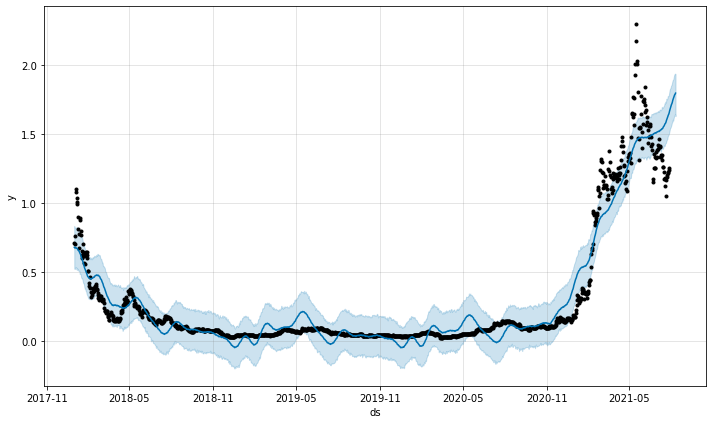

In [29]:
# lets do some visulization of our forecast values
fig1 = m.plot(forecast)

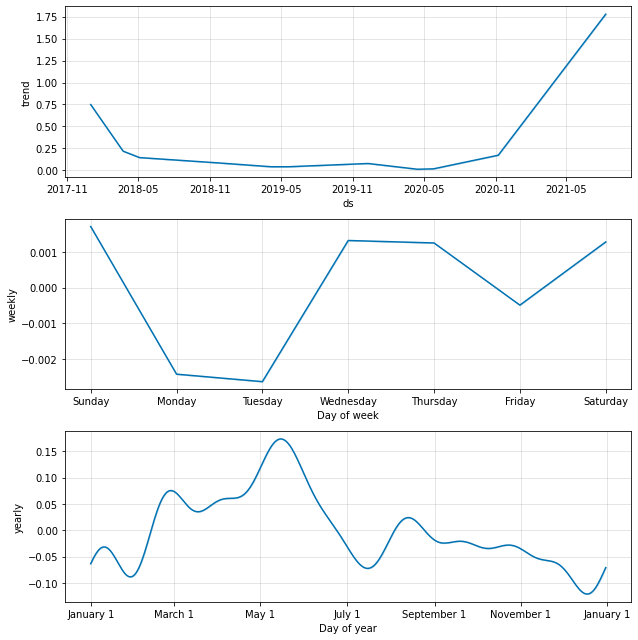

In [30]:
# fbprophet allows us to see the seasonality of prices
fig2 = m.plot_components(forecast)

# **Cross Validation**

In [32]:
from prophet.diagnostics import cross_validation

In [34]:
df_cv= cross_validation(m, horizon = '14 days')

INFO:prophet:Making 133 forecasts with cutoffs between 2019-01-01 00:00:00 and 2021-07-13 00:00:00


  0%|          | 0/133 [00:00<?, ?it/s]

In [35]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1857,2021-07-23,1.817595,1.678509,1.953517,1.205386,2021-07-13
1858,2021-07-24,1.828486,1.714683,1.961843,1.215002,2021-07-13
1859,2021-07-25,1.837133,1.706073,1.959146,1.228135,2021-07-13
1860,2021-07-26,1.841108,1.721240,1.972866,1.255189,2021-07-13
1861,2021-07-27,1.848696,1.715906,1.979033,1.239114,2021-07-13


In [36]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-01-02,0.054499,0.010175,0.102333,0.044337,2019-01-01
1,2019-01-03,0.051822,0.007655,0.095492,0.042003,2019-01-01
2,2019-01-04,0.051167,0.006704,0.094507,0.043085,2019-01-01
3,2019-01-05,0.052896,0.007266,0.095670,0.044035,2019-01-01
4,2019-01-06,0.041581,-0.004171,0.088156,0.048258,2019-01-01


In [38]:
from prophet.diagnostics import performance_metrics

In [40]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,0.024429,0.156299,0.082777,0.457720,0.301836,0.431704,0.638006
1,3 days,0.028530,0.168907,0.089584,0.486136,0.297950,0.452036,0.610074
2,4 days,0.033481,0.182978,0.097873,0.528797,0.351724,0.476451,0.585375
3,5 days,0.035474,0.188347,0.101135,0.564804,0.329475,0.505323,0.568195
4,6 days,0.035055,0.187229,0.101281,0.596389,0.369517,0.534974,0.553157
5,7 days,0.037607,0.193926,0.105553,0.630248,0.386718,0.567935,0.543496
6,8 days,0.038825,0.197040,0.106954,0.663375,0.449160,0.580859,0.541353
7,9 days,0.040795,0.201978,0.112297,0.700289,0.455253,0.596385,0.514472
8,10 days,0.045687,0.213744,0.118125,0.726397,0.481673,0.605270,0.514512
9,11 days,0.051095,0.226042,0.125523,0.759980,0.471075,0.615516,0.486539


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


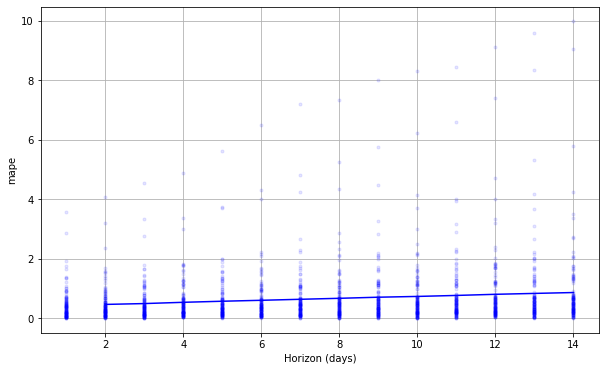

In [41]:
# lets visualize the cross validation performance
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')